# Goal

To walk the reader through all the 3 saliency cropping frameworks we have audited in our [paper](https://vinayprabhu.github.io/Saliency_Image_Cropping/). We hope this will provide a clear insight into how we constructed a _common ground_ for evaluating all the 3 frameworks.

In doing so, we also hope to educate the general audience on the fate of the infamous Obama-McConnell image (https://www.theguardian.com/technology/2020/sep/21/twitter-apologises-for-racist-image-cropping-algorithm) when passed through the Saliency cropping frameworks of Twitter, Google and Apple.
 
The constituent images produced here are stitched into a collage that forms the narrative sorrounding  "Figure 1" in our [paper](https://vinayprabhu.github.io/Saliency_Image_Cropping/).


![Visualization of the workflow](https://i.ibb.co/f2H9P0j/SIC-Obama-Mc-Connell.png)


# 1: Twitter's Saliency Image Cropping (SIC) framework

The cell below is from the official Twitter github repo (https://github.com/twitter-research/image-crop-analysis)

In [1]:
import logging
import shlex
import subprocess
import sys
from collections import namedtuple
from pathlib import Path
import math
import seaborn as sns


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

import pandas as pd
from tqdm.notebook import tqdm

logging.basicConfig(level=logging.ERROR)
######################################################
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install --quiet pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/twitter-research/image-crop-analysis.git
    HOME_DIR = Path("./image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/")
data_dir.exists()

True

## Now, let us pass the [image](https://pbs.twimg.com/media/EiT2SftUMAEjDRH?format=jpg&name=4096x4096) through the Twitter-SIC and see the results

None 583 3000
[0.56] 583 3000


image-crop-analysis/src/crop_api.py:348: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


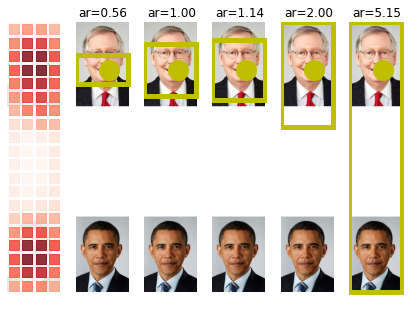

<Figure size 432x288 with 0 Axes>

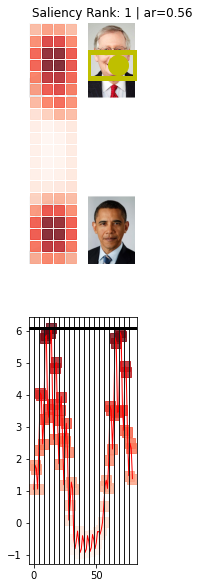

In [2]:
##########################################################
from crop_api import ImageSaliencyModel, is_symmetric, parse_output, reservoir_sampling
import urllib.request
model = ImageSaliencyModel(crop_binary_path=bin_path, crop_model_path=model_path)
URL='https://pbs.twimg.com/media/EiT2SftUMAEjDRH?format=jpg&name=4096x4096'
img_path='obama_mitch.jpg'
urllib.request.urlretrieve(URL, img_path)# Retrieve and save
model.plot_img_crops(Path(img_path), topK=1,aspectRatios= None,add_saliency_line= False)
cmd = f"{str(bin_path)} {str(model_path)} '{Path(img_path).absolute()}' show_all_points"
output = subprocess.check_output(cmd, shell=True)
dict_output_img=parse_output(output)
dict_output_img['salient_point'],dict_output_img['crops']
# The crops are formatted as (x_top_left,y_top_left,width,height)
# Row order: aspectRatios = [0.56, 1.0, 1.14, 2.0, img_h / img_w]
plt.figure()
ax=model.plot_img_crops(Path(img_path), topK=1,aspectRatios= [0.56],add_saliency_line= True)

# 2: Google's```CROP_HINTS``` API

Pass the [image](https://pbs.twimg.com/media/EiT2SftUMAEjDRH?format=jpg&name=4096x4096) through the '*Try it*'  [link](https://cloud.google.com/vision/docs/detecting-crop-hints?apix_params=%7B%22resource%22%3A%7B%22requests%22%3A%5B%7B%22image%22%3A%7B%22source%22%3A%7B%22imageUri%22%3A%22https%3A%2F%2Fpbs.twimg.com%2Fmedia%2FEiT2SftUMAEjDRH%3Fformat%3Djpg%26name%3D4096x4096%22%7D%7D%2C%22features%22%3A%5B%7B%22type%22%3A%22CROP_HINTS%22%7D%5D%2C%22imageContext%22%3A%7B%22cropHintsParams%22%3A%7B%22aspectRatios%22%3A%5B1.78571428571%5D%7D%7D%7D%5D%7D%7D#try_it) in the documentation guide.

The output you will receive looks something like this:

```
dict_google={
  "responses": [
    {
      "cropHintsAnnotation": {
        "cropHints": [
          {
            "boundingPoly": {
              "vertices": [
                {
                  "y": 2400
                },
                {
                  "x": 579,
                  "y": 2400
                },
                {
                  "x": 579,
                  "y": 2725
                },
                {
                  "y": 2725
                }
              ]
            },
            "confidence": 0.53422713,
            "importanceFraction": 0.108567595
          }
        ]
      }
    }
  ]
}
```

In [3]:
class DictX(dict):
    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError as k:
            raise AttributeError(k)

    def __setattr__(self, key, value):
        self[key] = value

    def __delattr__(self, key):
        try:
            del self[key]
        except KeyError as k:
            raise AttributeError(k)

    def __repr__(self):
        return '<DictX ' + dict.__repr__(self) + '>'
hint={
            "bounding_poly": {
              "vertices": [
                {"x": 0,
                  "y": 2400
                },
                {
                  "x": 579,
                  "y": 2400
                },
                {
                  "x": 579,
                  "y": 2725
                },
                {"x": 0,
                  "y": 2725
                }
              ]
            },
            "confidence": 0.53422713,
            "importance_fraction": 0.108567595
          }
# hint=DictX(hint_google)


## Extract the crop-hints results and visualize it:

Text(0.5, 1.0, 'Google \n Confidence:0.53 | IF: 0.11')

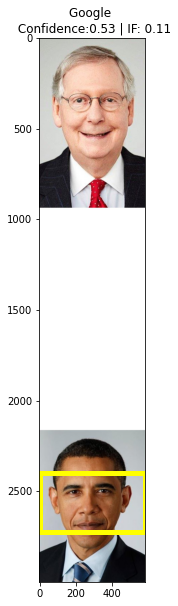

In [4]:
from matplotlib.patches import Rectangle
verts=[[vertex['x'], vertex['y']] for vertex in hint['bounding_poly']['vertices']]
vert_mat=np.asarray(verts)
width_crop=np.max(np.abs(np.diff(vert_mat[:,0])))+1
height_crop=np.max(np.abs(np.diff(vert_mat[:,1])))+1
fig, ax = plt.subplots(figsize=(5,10))
x_image=mpimg.imread(img_path)
ax.imshow(x_image,aspect=1)
rect = Rectangle((vert_mat[0,0], vert_mat[0,1]), width_crop,height_crop,linewidth=5, edgecolor='yellow', facecolor='none')
ax.add_patch(rect)
plt.title(f'Google \n Confidence:{np.round(hint["confidence"],2)} | IF: {np.round(hint["importance_fraction"],2)}')

# 3: Apple's Attention-based saliency cropping [(ABSC](https://developer.apple.com/documentation/vision/cropping_images_using_saliency))

The idea here is to visualize the fate of the image if Twitter's saliency estimation neural network was to be replaced by Apple's. The cropping policy based on the max-salient points is held constant to perform an apples-to-apples comparison.


This requires ```Xcode 13.2.1 + Swift``` and the output 68 x 68 saliency grid output is saved [here](https://gist.githubusercontent.com/vinayprabhu/29da9a4a5a4d266149dd078d1817f542/raw/7e092af99e390d92b2d34000f440fd125af30d19/obama_mitch_apple.csv).

Now, in the code cell below, we inherit Twitter's cropping-policy functions.


In [5]:
from PIL import Image
from collections import namedtuple
from matplotlib.patches import Rectangle
import logging
logging.basicConfig(level=logging.ERROR)

CropRectangle = namedtuple("CropRectangle", "left top width height")
def plot_crop_area(
      img,
      salient_x,
      salient_y,
      aspectRatio,
      title_plt='default',
      ax=None,
      original_crop=None,
      checkSymmetry=True,     
  ):
      if ax is None:
          fig, ax = plt.subplots(1, 1,figsize=(5,10))
      ax.imshow(img)
      ax.plot([salient_x], [salient_y], "-yo", ms=20)
      if (title_plt=='default'):
        ax.set_title(f"ar={aspectRatio:.2f}")
      else:
        ax.set_title(f"{title_plt} ar={aspectRatio:.2f}")
      ax.set_axis_off()

      patches = []
      if original_crop is not None:
          x, y, w, h = original_crop
          patches.append(
              Rectangle((x, y), w, h, linewidth=5, edgecolor="r", facecolor="none")
          )
          ax.add_patch(patches[-1])
          logging.info(f"ar={aspectRatio:.2f}: {((x, y, w, h))}")
      # For non top crops show the overlap of crop regions
      x, y, w, h = generate_crop(img, salient_x, salient_y, aspectRatio)
      logging.info(f"Gen: {((x, y, w, h))}")
      # print(x, y, w, h)
      patches.append(
          Rectangle((x, y), w, h, linewidth=5, edgecolor="y", facecolor="none")
      )
      ax.add_patch(patches[-1])

      if checkSymmetry and is_symmetric(img):
          x, y, w, h = generate_crop(img, img.shape[1], salient_y, aspectRatio)
          logging.info(f"Gen: {((x, y, w, h))}")
          # print(x, y, w, h)
          patches.append(
              Rectangle((x, y), w, h, linewidth=5, edgecolor="b", facecolor="none")
          )
          ax.add_patch(patches[-1])

      return ax,(x, y), w, h
def generate_crop(img, x, y, targetRatio):
    (
        imageHeight,
        imageWidth,
    ) = img.shape[:2]
    imageRatio: float = (imageHeight) / imageWidth

    if targetRatio < imageRatio:
        # squeeze vertically
        window = fit_window(y, np.round(targetRatio * imageWidth), imageHeight)
        top = window[0]
        height = max(window[1] - window[0], 1)
        left = 0
        width = imageWidth
    else:
        # squeeze horizontally
        window = fit_window(x, np.round(imageHeight / targetRatio), imageWidth)
        top = 0
        height = imageHeight
        left = window[0]
        width = max(window[1] - window[0], 1)

    rect = CropRectangle(left, top, width, height)
    return rect
def fit_window(center: int, width: int, maxWidth: int):
    if width > maxWidth:
        raise RuntimeError("error: width cannot exceed maxWidth")

    fr: int = center - width // 2
    to: int = fr + width

    if fr < 0:
        # window too far left
        fr = 0
        to = width
    elif to > maxWidth:
        # window too far right
        to = maxWidth
        fr = to - width
    return fr, to
def is_symmetric(
    image: np.ndarray, threshold: float = 25.0, percentile: int = 95, size: int = 10
) -> bool:
    if percentile > 100:
        raise RuntimeError("error: percentile must be between 0 and 100")
        return False

    # downsample image to a very small size
    mode = None
    if image.shape[-1] == 4:
        # Image is RGBA
        mode = "RGBA"
    imageResized = np.asarray(
        Image.fromarray(image, mode=mode).resize((size, size), Image.ANTIALIAS)
    ).astype(int)
    imageResizedFlipped = np.flip(imageResized, 1)

    # calculate absolute differences between image and reflected image
    diffs = np.abs(imageResized - imageResizedFlipped).ravel()

    maxValue = diffs.max()
    minValue = diffs.min()

    # compute asymmetry score
    score: float = np.percentile(diffs, percentile)
    logging.info(f"score [{percentile}]: {score}")
    score = score / (maxValue - minValue + 10.0) * 137.0
    logging.info(f"score: {score}\tthreshold: {threshold}\t{maxValue}\t{minValue}")
    return score < threshold

In [6]:
import cv2
url_csv='https://gist.githubusercontent.com/vinayprabhu/29da9a4a5a4d266149dd078d1817f542/raw/7e092af99e390d92b2d34000f440fd125af30d19/obama_mitch_apple.csv'
df_apple=pd.read_csv(url_csv,header=None)
print(df_apple)
sal_=df_apple.iloc[0,6]
list_sal=[float(s) for s in sal_[1:-1].split(',')]
mat_sal=np.array(list_sal).reshape(68,68)
heatmap_img=cv2.resize(mat_sal,(583,3000))
print('Max saliency point is:')
np.where(heatmap_img==heatmap_img.max())[1][0],       np.where(heatmap_img==heatmap_img.max())[0][0]

                                                   0  ...                                                  6
0  https://pbs.twimg.com/media/EiT2SftUMAEjDRH?fo...  ...  [0.051081724, 0.02944088, 0.025204398, 0.01637...

[1 rows x 7 columns]
Max saliency point is:


(304, 860)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4108a80e90>,
 (0, 697.0),
 583,
 326.0)

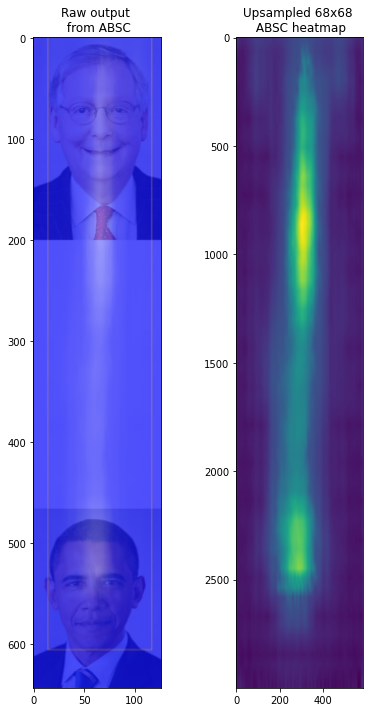

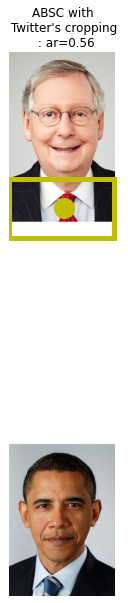

In [7]:
plt.figure(figsize=(6,10))
plt.subplot(121)
url='https://i.ibb.co/1f1YsDT/obama-mitch-apple.png'
img_path='obama_mitch_apple.png'
urllib.request.urlretrieve(url, img_path)# Retrieve and save
plt.imshow(mpimg.imread('obama_mitch_apple.png'))
plt.title('Raw output \n from ABSC')
plt.subplot(122)
plt.imshow(heatmap_img)
plt.title('Upsampled 68x68 \n ABSC heatmap')
plt.tight_layout()
img=mpimg.imread('obama_mitch.jpg')
plot_crop_area(
      img,
      np.where(heatmap_img==heatmap_img.max())[1][0],
      np.where(heatmap_img==heatmap_img.max())[0][0],
      0.56,
      'ABSC with \n Twitter\'s cropping \n :')